In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv("train.csv")

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
test = pd.read_csv("test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Taking a look at the data

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
#Looking at the variance
for col in df.columns:
    if df[col].dtype == int:
        print(col, df[col].var())


In [24]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
df.shape

(891, 12)

Since the Cabin col is almost filled with NaN, I am going to drop that.

In [26]:
df.drop('Cabin', axis=1, inplace=True)
df.shape

(891, 11)

In [27]:
df = df[df['Age'].notna()]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [28]:
df['Age'] = df['Age'].astype(int)

In [29]:
df.drop('Name', axis=1, inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Sex          714 non-null    object 
 4   Age          714 non-null    int32  
 5   SibSp        714 non-null    int64  
 6   Parch        714 non-null    int64  
 7   Ticket       714 non-null    object 
 8   Fare         714 non-null    float64
 9   Embarked     712 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(3)
memory usage: 58.6+ KB


In [31]:
df = df[df['Embarked'].notna()]

Now that the null values are gone. Let's take a look at the test set.

In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


We are going to be dropping the Cabin, Name column. We will fill the Age column With the median. We will drop the NaN from the Fare.

In [33]:
test['Age'].fillna(round(test['Age'].median()),inplace=True)

In [34]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [35]:
test['Age'] = test['Age'].astype(int)

In [36]:
test.drop(['Name', 'Cabin'], axis=1, inplace=True)
test['Fare'].dropna(axis=0,inplace=True)

In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    int32  
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Embarked     418 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(3)
memory usage: 27.9+ KB


## vis


AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

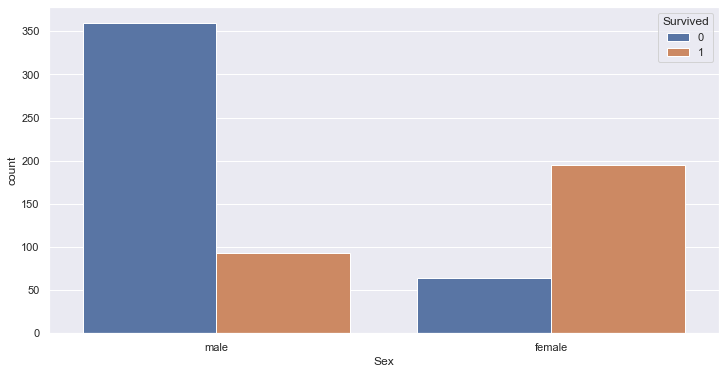

In [38]:
sns.set()
fig = plt.figure(figsize=(12,6))
g = sns.countplot(x="Sex", hue="Survived", data=df)
g.bar_label(g.containers[0])
g.bar_label(g.containers[1])
plt.title("Sex Vs Survived", size=15)
plt.show()

Wow, that is just awesome. They prioratized on the evacuation of the females I guess. That is why there is a large no of female survivors.

In [ ]:
fig = plt.figure(figsize=(20,15))
g = sns.countplot(x="Age",hue='Survived', data=df)
g.bar_label(g.containers[0])
g.bar_label(g.containers[1])
plt.xticks(rotation=90)
plt.title("Age Vs Survival", size=15)
plt.show()

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.countplot(x="Pclass", data=df)
plt.title("Class and their Count", size=15)
plt.show()

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.countplot(x="Embarked", data=df)
plt.title("Embarkment and their Count", size=15)
plt.show()

Since we looked at some EDA. Now let's move and look if the data needs to be scaled. We will be dropping the Sex column since it is not going to be used for prediction

In [ ]:
df.drop(['Sex', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [ ]:
df.info()

In [ ]:
test.info()

In [ ]:
test.drop(['Sex', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [ ]:
test.loc[test['Fare'].isnull(), 'Fare'] = np.nanmedian(test['Fare'])

In [ ]:
test.info()

In [42]:
X_train = df.drop('Survived', axis=1)
y_train = df['Survived']
X_test = test

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

param = [
    {'n_estimators': [100, 200, 300, 400, 450, 500], 
     'max_depth': [3, 4, 6, 8, 10, 12], 
     'max_leaf_nodes': [15, 20, 25]}, 
]

rf = RandomForestClassifier()
gs_rf = GridSearchCV(rf, param, cv = 5, n_jobs = -1, verbose = 1)
gs_rf.fit(X_train, y_train)

rf_best = gs_rf.best_estimator_
gs_rf.best_estimator_, gs_rf.score(X_train, y_train)
pred = gs_rf.predict(X_test)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:    0.9s finished


ValueError: could not convert string to float: 'male'

In [41]:
predictions = gs_rf.predict(X_test).astype(np.uint8)
sub = pd.read_csv('../input/titanic/gender_submission.csv')
sub['Survived'] = predictions
sub.to_csv('submission.csv', index = False)
pd.value_counts(predictions)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.